Can Bollywood box office films' gross revenue be modeled as a function of budget (crore).

Dataset: bollywood_boxoffice.csv

Source: http://www.bollymoviereviewz.com

Description: Box office gross revenue and budget (crore) for 190 Bollywood films from 2013-2017. 

Variables:
Movie
Gross
Budget

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bollywood_boxoffice.csv', encoding='ANSI')

In [3]:
df

,Movie,Gross,Budget
0,Ek Villain,95.64,36.0
1,Humshakals,55.65,77.0
2,Holiday,110.01,90.0
3,Fugly,11.16,16.0
4,City Lights,5.19,9.5
...,...,...,...
185,Hero,31.75,28.0
186,WelcomeBack,96.88,100.0
187,Brothers,77.18,82.0
188,Drishyam,65.22,65.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 3 columns):
Movie     190 non-null object
Gross     190 non-null float64
Budget    190 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.6+ KB


In [5]:
df.describe()

,Gross,Budget
count,190.000000,190.000000
mean,53.390421,45.252632
std,69.016895,34.082329
min,0.630000,4.000000
25%,9.250000,19.000000
50%,29.375000,34.500000
75%,70.420000,70.000000
max,500.750000,150.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6A687BF48>,
      dtype=object)

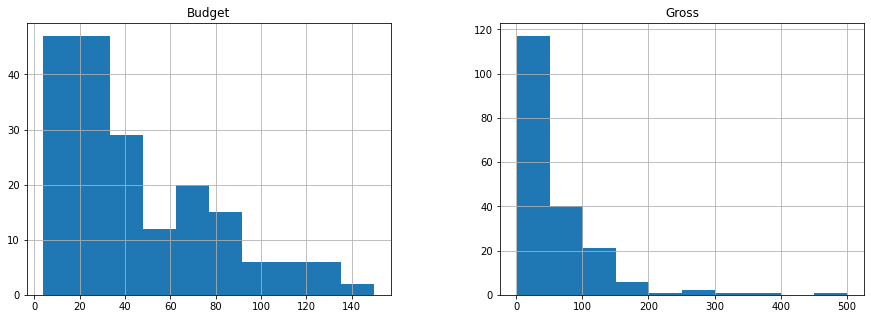

In [6]:
df.select_dtypes(include=['float64', 'int64']).hist(bins=10, figsize=(15, 5))

Budget and gross are not normally distributed. There are a lot more values on the lower end.

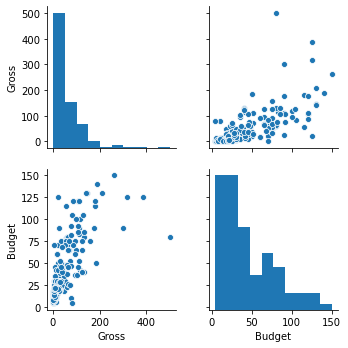

In [7]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))

There is some correlation between Gross and Budget.

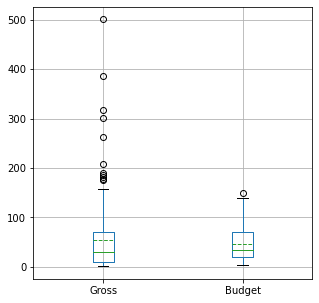

In [8]:
df.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=(5,5), layout=None, return_type=None, showmeans=True, meanline=True)

There are many more outliers in Gross than in Budget. This indicates that some films outperformed the trend.

In [25]:
X = df['Gross']
y = df['Budget']

In [10]:
import statsmodels.api as sm

In [26]:
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
result = model.fit()

In [27]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Budget   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 04 Apr 2020   Prob (F-statistic):           2.33e-27
Time:                        02:53:21   Log-Likelihood:                -880.08
No. Observations:                 190   AIC:                             1764.
Df Residuals:                     188   BIC:                             1771.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.2671      2.294     11.886      0.000      22.742      31.793
Gross          0.3369      0.026     12.792      0.000       0.285       0.389
==============================================================================
Omnibus:                       18.849   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.729
Skew:                           0.312   Prob(JB):                     2.15e-12
Kurtosis:                       5.529   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model is able to explain 46.5 % of the variance, the coefficients are significant, and the model fit is also significant.

In [28]:
y_pred = result.predict(X_sm)

In [30]:
residual = (y - y_pred)

d:\programfiles_x64\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


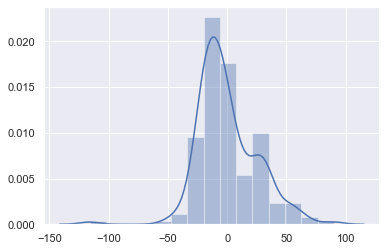

In [36]:
sns.set()
sns.distplot(residual, bins = 15)

Residuals are centered just below 0 and the distribution is not perfectly normal.

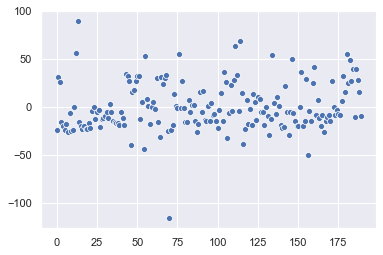

In [39]:
sns.scatterplot(x=residual.index, y=residual)

There does not seem to be a time-series pattern in the residuals. 

# Refitting the model on natural log of variables

In [40]:
df['ln_gross'] = np.log(df['Gross'])

In [41]:
df['ln_budget'] = np.log(df['Budget'])

In [42]:
X1 = df['ln_gross']
y1 = df['ln_budget']

In [43]:
X1_sm = sm.add_constant(X1)
model1 = sm.OLS(y1, X1_sm)
result1 = model1.fit()

d:\programfiles_x64\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [44]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln_budget   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     279.9
Date:                Sat, 04 Apr 2020   Prob (F-statistic):           4.49e-39
Time:                        03:17:43   Log-Likelihood:                -147.69
No. Observations:                 190   AIC:                             299.4
Df Residuals:                     188   BIC:                             305.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0612      0.094     21.823      0.000       1.875       2.248
ln_gross       0.4533      0.027     16.730      0.000       0.400       0.507
==============================================================================
Omnibus:                       36.071   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.366
Skew:                          -0.749   Prob(JB):                     8.00e-24
Kurtosis:                       6.346   Cond. No.                         9.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared has incresed, coefficients are still significant, F-statistic has incresed, but model is still significant.

In [45]:
y1_pred = result1.predict(X1_sm)

In [46]:
residual1 = (y1 - y1_pred)

d:\programfiles_x64\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


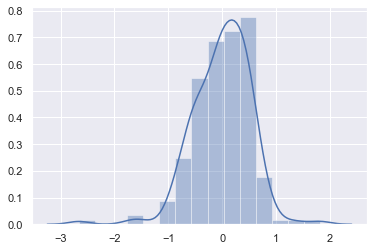

In [47]:
sns.distplot(residual1, bins = 15)

Residuals are more centered towards 0 and the distribution is more normal.

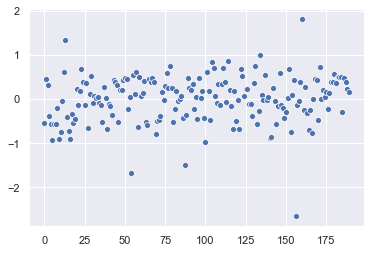

In [48]:
sns.scatterplot(x=residual1.index, y=residual1)

There does not seem to be a time-series pattern in the residuals. 